# Punto 1: Clasificación con Árboles de Decisión (CART)

**Objetivo**: Entrenar un modelo de clasificación basado en árboles de decisión para identificar letras del dataset [Letter Recognition de UCI](https://archive.ics.uci.edu/dataset/59/letter+recognition) y generar reglas interpretables a partir del modelo.

**Técnicas aplicadas**:
- **Algoritmo**: Implementación de CART (Classification and Regression Trees) usando `scikit-learn`.
- **División de datos**: Separación del dataset en conjuntos de entrenamiento y prueba (`train_test_split`).
- **Validación**: Evaluación del modelo mediante validación cruzada (k-fold) para asegurar su robustez.
- **Análisis**: Extracción de reglas de decisión, visualización del árbol y análisis de la importancia de las características.

**Métricas de evaluación**:
- Accuracy, Precision, Recall y F1-score.
- Matriz de confusión.

## 1. Carga de Datos y Librerías

Se importan las librerías necesarias para el análisis, incluyendo `pandas` para la manipulación de datos, `scikit-learn` para el modelo de árbol de decisión y su evaluación, y `matplotlib` para la visualización.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np

### Carga del Dataset

El dataset **Letter Recognition** se carga directamente desde el repositorio de UCI. Contiene 20,000 instancias y 16 atributos numéricos que representan características estadísticas extraídas de imágenes de las 26 letras mayúsculas del alfabeto.

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/letter-recognition.data"
column_names = [
    "letter",
    "x-box",
    "y-box",
    "width",
    "height",
    "onpix",
    "x-bar",
    "y-bar",
    "x2bar",
    "y2bar",
    "xybar",
    "x2ybr",
    "xy2br",
    "x-ege",
    "xegvy",
    "y-ege",
    "yegvx",
]
df = pd.read_csv(url, header=None, names=column_names)
df.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


## 2. Preparación de Datos

Se dividen los datos en características (`X`) y la variable objetivo (`y`). La columna 'letter' para poder realizar el metodo de clasificación correspondiente. Se procede con la division de los datos en conjuntos de entrenamiento (80%) y prueba (20%) utilizando `train_test_split`. El parámetro `stratify=y` asegura que la proporción de cada clase se mantenga en ambos conjuntos, lo cual es crucial para datasets con muchas clases.

In [4]:
X = df.drop("letter", axis=1)
y = df["letter"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Dimensiones de X_train: {X_train.shape}")
print(f"Dimensiones de X_test: {X_test.shape}")

Dimensiones de X_train: (16000, 16)
Dimensiones de X_test: (4000, 16)


## 3. Entrenamiento del Árbol de Decisión

Se instancia un `DecisionTreeClassifier`. Se utiliza `criterion='entropy'` para que el algoritmo use la **ganancia de información** para decidir las divisiones en cada nodo, siguiendo el principio del algoritmo ID3/C4.5. El modelo se entrena con los datos de `X_train` y `y_train`.

In [5]:
dt_classifier = DecisionTreeClassifier(criterion="entropy", random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del modelo: {accuracy:.4f}")

Accuracy del modelo: 0.8840


Se observo una clasificacion del 88.4% de las letras en el conjutno de prueba

## 4. Evaluación del Modelo

La evaluación del modelo es fundamental para entender su rendimiento. Se utilizan tres enfoques:
1.  **Matriz de Confusión**: Muestra el número de predicciones correctas e incorrectas por clase. Es útil para ver qué letras se confunden entre sí.
2.  **Reporte de Clasificación**: Proporciona métricas detalladas (Precision, Recall, F1-score) para cada una de las 26 clases, permitiendo un análisis granular del rendimiento.
3.  **Validación Cruzada**: Se realiza una validación cruzada de 10 folds (`cv=10`) sobre todo el dataset para obtener una estimación más robusta y menos sesgada del `accuracy` del modelo. Esto ayuda a confirmar que el buen rendimiento no se debe a la división particular de entrenamiento/prueba.

In [11]:
# Matriz de confusión con etiquetas visibles
conf_matrix = confusion_matrix(y_test, y_pred)
conf_df = pd.DataFrame(
    conf_matrix,
    index=[f"Real {cls}" for cls in set(y_test)],
    columns=[f"Pred {cls}" for cls in set(y_test)]
)

print("Matriz de Confusión:")
print(conf_df)

# Reporte en modo tabla
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))

Matriz de Confusión:
        Pred S  Pred O  Pred R  Pred X  Pred Q  Pred A  Pred I  Pred P  \
Real S     151       0       0       0       0       0       2       0   
Real O       0     133       0       1       0       2       2       0   
Real R       0       1     130       0       1       1       7       0   
Real X       1       2       0     136       0       2       2       6   
Real Q       0       0       4       0     134       1       1       0   
Real A       0       1       1       1       0     129       0       3   
Real I       0       0       8       0       3       0     126       1   
Real P       1       2       0       4       0       0       0     121   
Real U       1       1       1       1       0       2       0       1   
Real N       1       1       0       1       0       2       0       0   
Real Z       1       0       1       3       0       0       0       3   
Real L       0       0       1       0       2       0       2       0   
Real Y       0   

### Validación Cruzada

In [7]:
cv_scores = cross_val_score(dt_classifier, X, y, cv=10)
print("Resultados de la Validación Cruzada (Accuracy por fold):")
print(cv_scores)
print(f"\nAccuracy Promedio (Validación Cruzada): {np.mean(cv_scores):.4f}")
print(f"Desviación Estándar (Validación Cruzada): {np.std(cv_scores):.4f}")

Resultados de la Validación Cruzada (Accuracy por fold):
[0.8995 0.8725 0.8935 0.901  0.888  0.872  0.904  0.8915 0.8905 0.887 ]

Accuracy Promedio (Validación Cruzada): 0.8900
Desviación Estándar (Validación Cruzada): 0.0103


## 5. Análisis del Árbol de Decisión

Una de las principales ventajas de los árboles de decisión es su interpretabilidad. A continuación, se analiza el modelo desde tres perspectivas:

### Extracción de Reglas

Se utiliza `export_text` para convertir el árbol entrenado en un conjunto de reglas legibles `if-then-else`. Esto permite entender exactamente cómo el modelo toma sus decisiones. Se imprimen las primeras 20 líneas para mostrar la estructura jerárquica de las decisiones.

In [12]:
tree_rules = export_text(dt_classifier, feature_names=list(X.columns))
print("Reglas del Árbol de Decisión (primeros niveles):\n")
for line in tree_rules.split("\n")[:20]:
    print(" • " + line)

Reglas del Árbol de Decisión (primeros niveles):

 • |--- y-ege <= 2.50
 • |   |--- x-ege <= 2.50
 • |   |   |--- y-bar <= 8.50
 • |   |   |   |--- x2ybr <= 3.50
 • |   |   |   |   |--- y2bar <= 3.50
 • |   |   |   |   |   |--- class: A
 • |   |   |   |   |--- y2bar >  3.50
 • |   |   |   |   |   |--- xybar <= 9.50
 • |   |   |   |   |   |   |--- x-ege <= 1.50
 • |   |   |   |   |   |   |   |--- class: L
 • |   |   |   |   |   |   |--- x-ege >  1.50
 • |   |   |   |   |   |   |   |--- class: A
 • |   |   |   |   |   |--- xybar >  9.50
 • |   |   |   |   |   |   |--- x-ege <= 1.50
 • |   |   |   |   |   |   |   |--- yegvx <= 8.50
 • |   |   |   |   |   |   |   |   |--- class: J
 • |   |   |   |   |   |   |   |--- yegvx >  8.50
 • |   |   |   |   |   |   |   |   |--- class: L
 • |   |   |   |   |   |   |--- x-ege >  1.50
 • |   |   |   |   |   |   |   |--- xy2br <= 6.50


### Visualización del Árbol

Se grafica el árbol de decisión para visualizar su estructura. Para mantener la legibilidad, se limita la profundidad a 3 niveles (`max_depth=3`). Cada nodo muestra la regla de división, la entropía, el número de muestras y la distribución de clases.

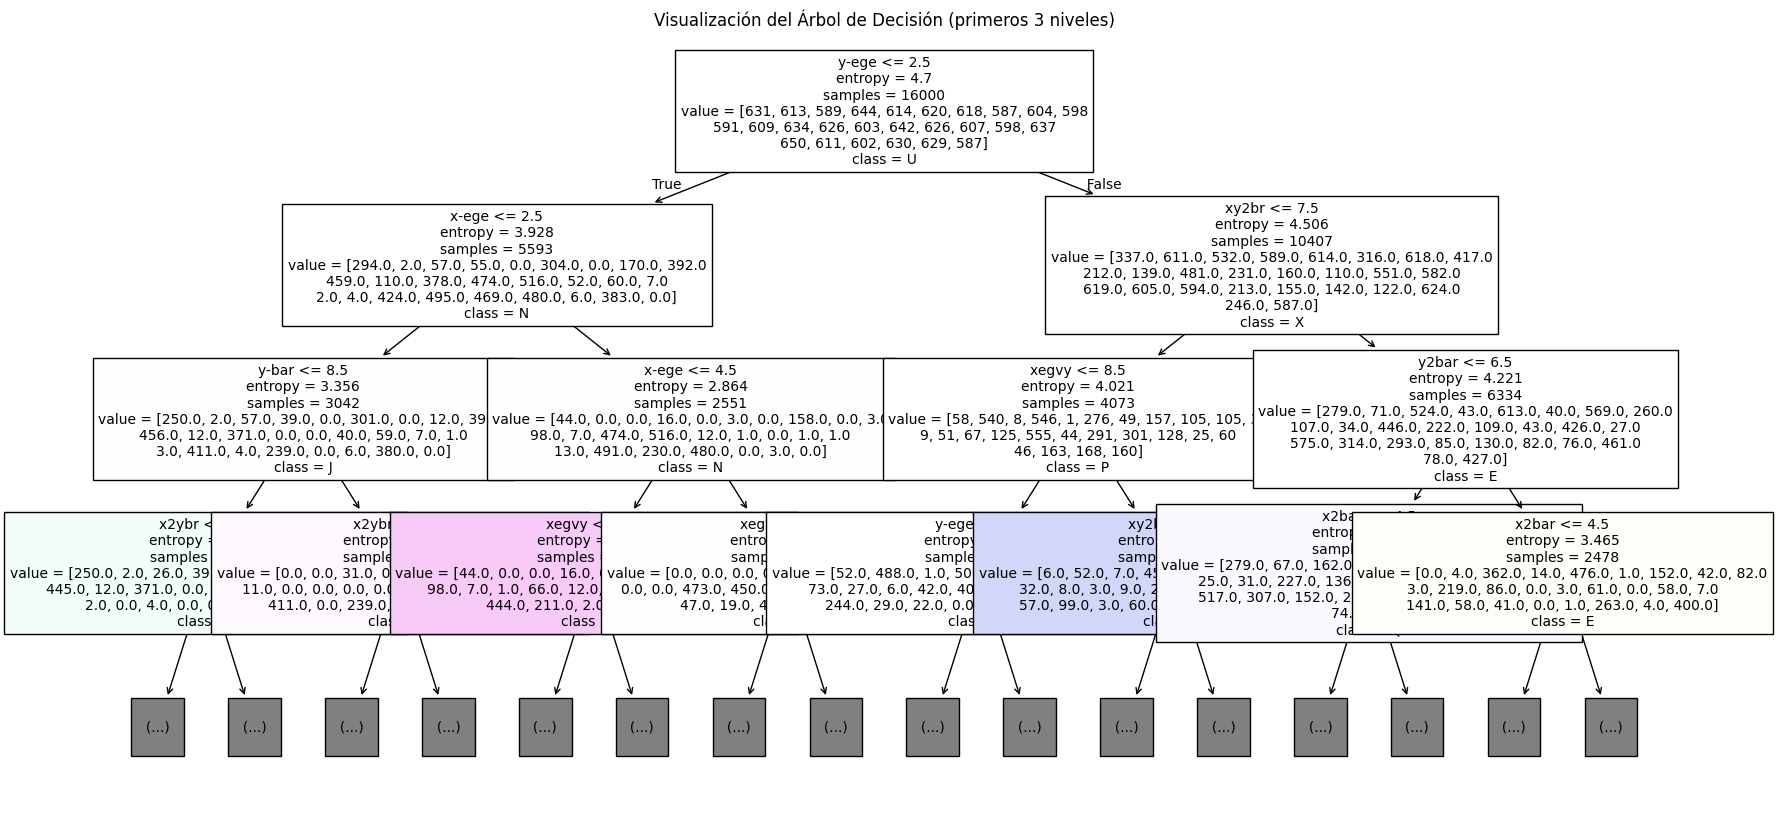

In [9]:
plt.figure(figsize=(20, 10))
plot_tree(
    dt_classifier,
    feature_names=X.columns,
    class_names=sorted(y.unique()),
    filled=True,
    max_depth=3,
    fontsize=10,
)
plt.title("Visualización del Árbol de Decisión (primeros 3 niveles)")
plt.show()

### Importancia de las Características

El atributo `feature_importances_` del clasificador nos indica la relevancia de cada característica en la construcción del árbol. Se calcula como la reducción total (normalizada) del criterio de impureza (en este caso, entropía) aportada por esa característica. Un valor más alto significa que la característica fue más importante para la clasificación.

In [10]:
feature_importances = pd.DataFrame(
    {"feature": X.columns, "importance": dt_classifier.feature_importances_}
).sort_values("importance", ascending=False)

print("Importancia de las Características:")
print(feature_importances)

Importancia de las Características:
   feature  importance
12   x-ege    0.174468
14   y-ege    0.156825
8    y2bar    0.091761
13   xegvy    0.088470
11   xy2br    0.086572
7    x2bar    0.085844
10   x2ybr    0.071274
6    y-bar    0.069908
9    xybar    0.055509
15   yegvx    0.054307
5    x-bar    0.026020
1    y-box    0.011724
4    onpix    0.008310
0    x-box    0.007004
3   height    0.006322
2    width    0.005682
